In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mka = pd.read_csv("../attractions/attractions_mk.csv")
mka.head()

,datetime,seven_dwarfs_train,pirates_of_caribbean,splash_mountain
0,2015-01-01 07:00:00,45.0,na,5.0
1,2015-01-01 08:00:00,78.0,na,5.0
2,2015-01-01 09:00:00,103.0,na,5.0
3,2015-01-01 10:00:00,88.0,28.0,16.0
4,2015-01-01 11:00:00,86.0,62.0,22.0


In [3]:
# Added DATE column to mk from the datetime column, using it to concat dataframes
mka['DATE'] = pd.to_datetime(mka['datetime']).dt.date
mka['DATE'] = pd.to_datetime(mka["DATE"])
print(mka.info())
mka.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31059 entries, 0 to 31058
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              31059 non-null  object        
 1   seven_dwarfs_train    31059 non-null  object        
 2   pirates_of_caribbean  31059 non-null  object        
 3   splash_mountain       31059 non-null  object        
 4   DATE                  31059 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.2+ MB
None


,datetime,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DATE
0,2015-01-01 07:00:00,45.0,na,5.0,2015-01-01
1,2015-01-01 08:00:00,78.0,na,5.0,2015-01-01
2,2015-01-01 09:00:00,103.0,na,5.0,2015-01-01
3,2015-01-01 10:00:00,88.0,28.0,16.0,2015-01-01
4,2015-01-01 11:00:00,86.0,62.0,22.0,2015-01-01


In [4]:
md = pd.read_csv("../metadata/mk_metadata.csv")

In [5]:
md.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
0,2015-01-01,5,0,0,1,2015,0,5,1,0,...,1.0,1,0,0,53.375714,70.3,50.2,0.12,616246,53904354
1,2015-01-02,6,1,0,1,2015,2,5,0,0,...,1.0,1,0,0,53.750714,70.3,50.0,0.12,616246,53904354
2,2015-01-03,7,2,0,1,2015,3,0,0,0,...,1.0,1,0,0,49.212857,70.3,49.9,0.07,616246,53904354
3,2015-01-04,1,3,1,1,2015,4,0,0,0,...,1.0,1,0,0,48.270714,70.3,49.8,0.12,616246,53904354
4,2015-01-05,2,4,1,1,2015,5,0,0,0,...,1.0,1,0,0,48.971538,70.3,49.6,0.12,616246,53904354


In [6]:
# Convert DATE column to datetime
md['DATE'] = pd.to_datetime(md["DATE"])
md.head(1)

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,HOLIDAY,WDWevent,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
0,2015-01-01,5,0,0,1,2015,0,5,1,0,...,1.0,1,0,0,53.375714,70.3,50.2,0.12,616246,53904354


In [7]:
mk = pd.merge(mka, md, how='outer', on='DATE')
mk.head()

,datetime,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
0,2015-01-01 07:00:00,45.0,na,5.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
1,2015-01-01 08:00:00,78.0,na,5.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
2,2015-01-01 09:00:00,103.0,na,5.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
3,2015-01-01 10:00:00,88.0,28.0,16.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
4,2015-01-01 11:00:00,86.0,62.0,22.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0


In [8]:
mk.to_csv('../metadata/mk.csv', index = False)

In [9]:
mk.head()

,datetime,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
0,2015-01-01 07:00:00,45.0,na,5.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
1,2015-01-01 08:00:00,78.0,na,5.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
2,2015-01-01 09:00:00,103.0,na,5.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
3,2015-01-01 10:00:00,88.0,28.0,16.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
4,2015-01-01 11:00:00,86.0,62.0,22.0,2015-01-01,5.0,0.0,0.0,1.0,2015.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0


In [10]:
# Dropped unneeded Date column
mk.drop('DATE', axis = 1,  inplace = True)
mk

,datetime,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
0,2015-01-01 07:00:00,45.0,na,5.0,5.0,0.0,0.0,1.0,2015.0,0.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
1,2015-01-01 08:00:00,78.0,na,5.0,5.0,0.0,0.0,1.0,2015.0,0.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
2,2015-01-01 09:00:00,103.0,na,5.0,5.0,0.0,0.0,1.0,2015.0,0.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
3,2015-01-01 10:00:00,88.0,28.0,16.0,5.0,0.0,0.0,1.0,2015.0,0.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
4,2015-01-01 11:00:00,86.0,62.0,22.0,5.0,0.0,0.0,1.0,2015.0,0.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31054,2019-12-31 22:00:00,83.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31055,2019-12-31 23:00:00,46.0,12.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31056,2019-12-31 06:00:00,na,na,na,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31057,2020-01-01 00:00:00,107.0,11.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mk.set_index('datetime', inplace=True)
mk.sort_index(inplace=True)

In [12]:
mk.head(2)

,seven_dwarfs_train,pirates_of_caribbean,splash_mountain,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,HOLIDAYPX,HOLIDAYM,...,MKDAYSBEFORENONEVENT,MKDAYSSINCENONEVENT,MKEVENTSTREAK,MKEVENTSTREAK_F,WDWMINTEMP_mean,WEATHER_WDWHIGH,WEATHER_WDWLOW,WEATHER_WDWPRECIP,CapacityLost_MK,CapacityLostWGT_MK
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 07:00:00,45.0,na,5.0,5.0,0.0,0.0,1.0,2015.0,0.0,5.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0
2015-01-01 08:00:00,78.0,na,5.0,5.0,0.0,0.0,1.0,2015.0,0.0,5.0,...,1.0,1.0,0.0,0.0,53.375714,70.3,50.2,0.12,616246.0,53904354.0


In [13]:
mk.isnull().sum()

seven_dwarfs_train       0
pirates_of_caribbean     0
splash_mountain          0
DAYOFWEEK               22
DAYOFYEAR               22
                        ..
WEATHER_WDWHIGH         22
WEATHER_WDWLOW          22
WEATHER_WDWPRECIP       22
CapacityLost_MK         22
CapacityLostWGT_MK      22
Length: 68, dtype: int64

In [14]:
mk.fillna(0, inplace=True)
mk.isnull().sum()

seven_dwarfs_train      0
pirates_of_caribbean    0
splash_mountain         0
DAYOFWEEK               0
DAYOFYEAR               0
                       ..
WEATHER_WDWHIGH         0
WEATHER_WDWLOW          0
WEATHER_WDWPRECIP       0
CapacityLost_MK         0
CapacityLostWGT_MK      0
Length: 68, dtype: int64

In [15]:
# mk2 = mk[['MKOPEN', 'MKCLOSE',  'MKEMHOPEN', 'MKEMHCLOSE',
#        'MKOPENYEST', 'MKCLOSEYEST', 'MKOPENTOM',
#        'MKCLOSETOM']].copy()
# mk2.head(2)

In [16]:
for col in ['MKOPEN', 'MKCLOSE',  'MKEMHOPEN', 'MKEMHCLOSE',
       'MKOPENYEST', 'MKCLOSEYEST', 'MKOPENTOM',
       'MKCLOSETOM','SUNSET_WDW']:
    mk[col] = np.where(mk[col] == "24:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "27:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "26:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "25:00",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "23:55",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "29:59",'23:59' ,mk[col])
    mk[col] = np.where(mk[col] == "30:00",'23:59' ,mk[col])

In [17]:
for col in ['MKOPEN', 'MKCLOSE',  'MKEMHOPEN', 'MKEMHCLOSE',
       'MKOPENYEST', 'MKCLOSEYEST', 'MKOPENTOM',
       'MKCLOSETOM','SUNSET_WDW']:
    mk[col] = mk[col].str.replace(":","")

In [18]:
mk.fillna(0, inplace=True)
mk.isnull().values.sum()

0

In [19]:
for col in ['MKOPEN', 'MKCLOSE',  'MKEMHOPEN', 'MKEMHCLOSE',
       'MKOPENYEST', 'MKCLOSEYEST', 'MKOPENTOM',
       'MKCLOSETOM','SUNSET_WDW']:
    mk[col] = mk[col].astype(int)

In [20]:
for col in ['inSession', 'inSession_Enrollment', 'inSession_wdw',
       'inSession_sqrt_WDW', 'inSession_DC', 'inSession_Central_FL',
       'inSession_Drive1_FL', 'inSession_Drive2_FL',
       'inSession_Florida', 'inSession_Mardi_Gras', 'inSession_Midwest',
       'inSession_NY_NJ', 'inSession_NY_NJ_PA', 'inSession_New_England',
       'inSession_New_Jersey', 'inSession_Nothwest', 'INSESSION_PLANES',
       'inSession_SoCal', 'inSession_Southwest']:
    mk[col] = mk[col].str.replace(r'%', r'').astype('float')/-100

In [21]:
for col in ['seven_dwarfs_train', "pirates_of_caribbean", "splash_mountain"]:
    mk[col] = pd.to_numeric(mk[col],errors='coerce')

In [22]:
mk.fillna(0, inplace=True)
mk.isnull().values.sum()

0

In [23]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31059 entries, 2015-01-01 07:00:00 to 2020-01-01 01:00:00
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   seven_dwarfs_train     31059 non-null  float64
 1   pirates_of_caribbean   31059 non-null  float64
 2   splash_mountain        31059 non-null  float64
 3   DAYOFWEEK              31059 non-null  float64
 4   DAYOFYEAR              31059 non-null  float64
 5   WEEKOFYEAR             31059 non-null  float64
 6   MONTHOFYEAR            31059 non-null  float64
 7   YEAR                   31059 non-null  float64
 8   HOLIDAYPX              31059 non-null  float64
 9   HOLIDAYM               31059 non-null  float64
 10  HOLIDAY                31059 non-null  float64
 11  WDWevent               31059 non-null  float64
 12  WDWrace                31059 non-null  float64
 13  WDWSEASON              31059 non-null  object 
 14  WDWMAXTEMP             3105

In [24]:
# pirates_of_caribbean = mk.drop(["seven_dwarfs_train","splash_mountain"], axis = 1)
# splash_mountain = mk.drop(["pirates_of_caribbean","seven_dwarfs_train"], axis = 1)
# seven_dwarfs_train = mk.drop(["pirates_of_caribbean","splash_mountain"], axis = 1)
# pirates_of_caribbean

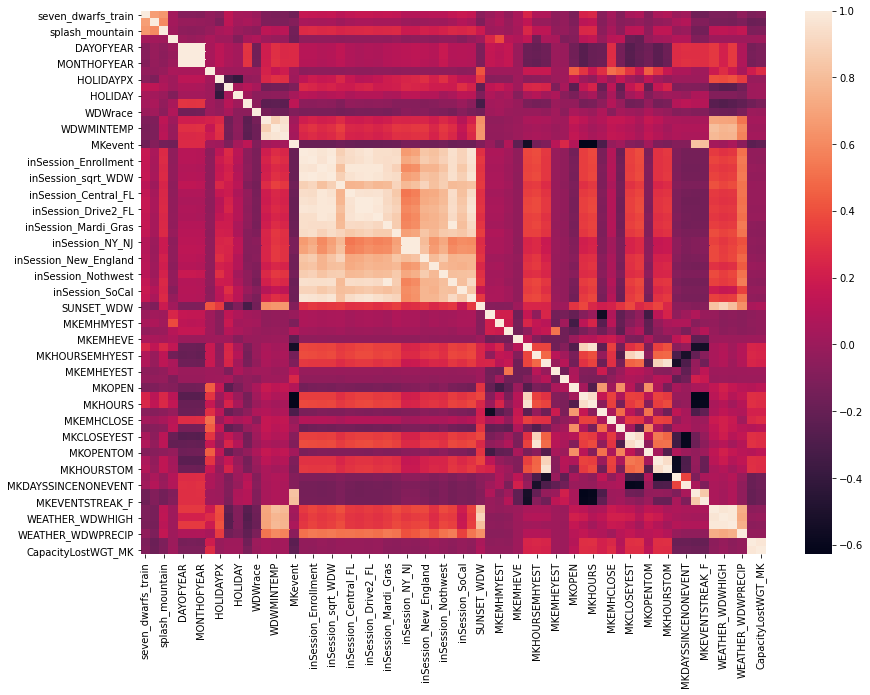

In [25]:
# Almost unreadable heatmap
corr = mk.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr)
plt.show()

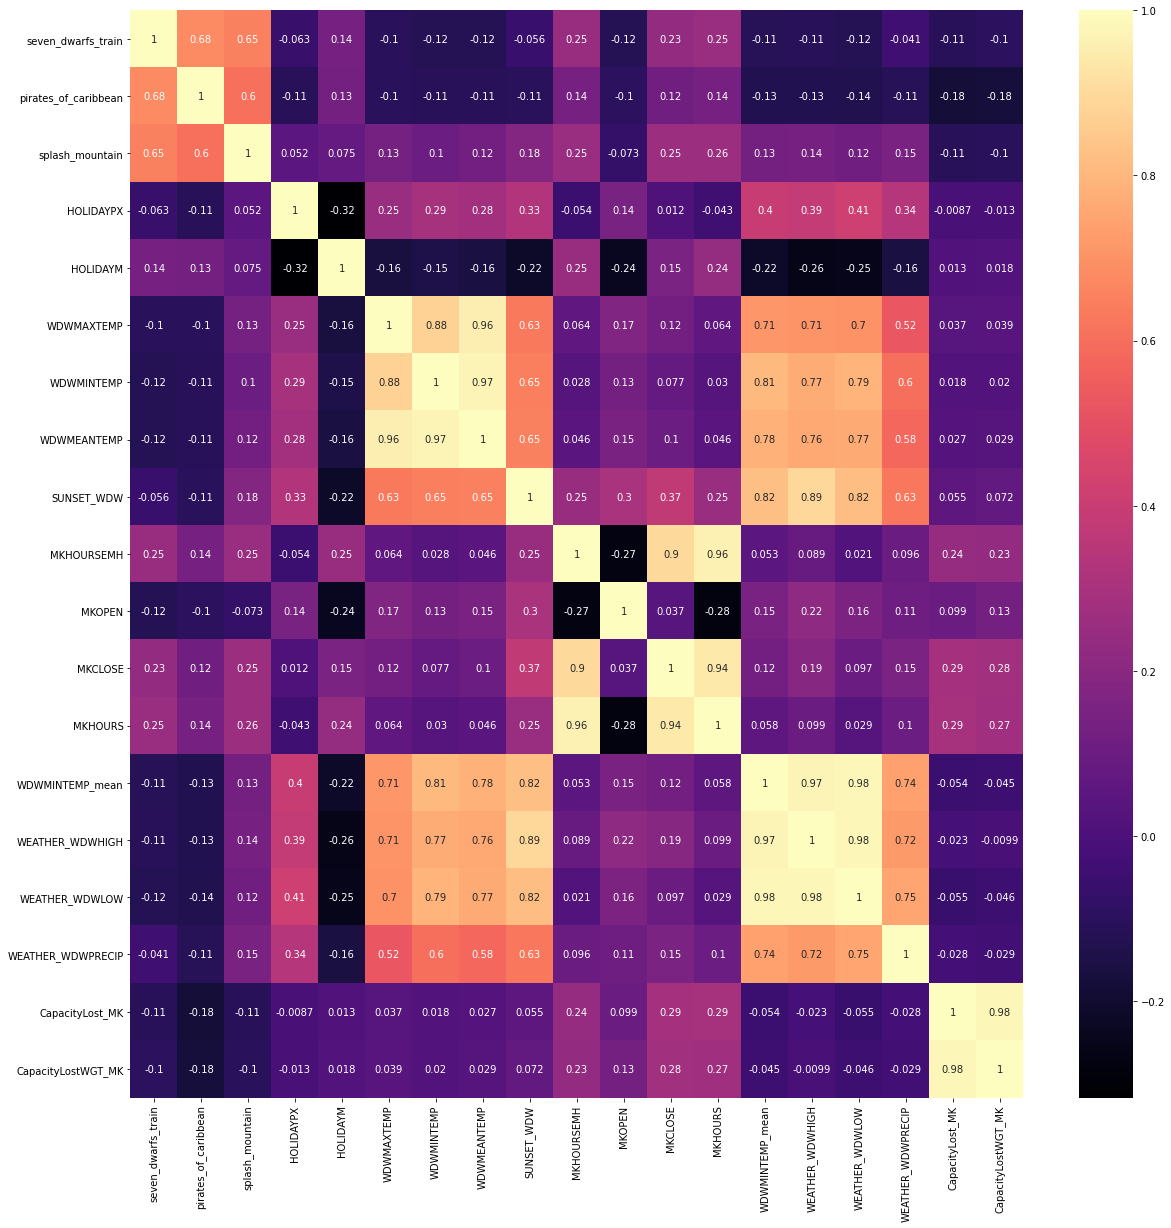

In [26]:
top_corr = mk.corr()
top_corr_features = top_corr.index[abs(top_corr["pirates_of_caribbean"]) > .10]
plt.figure(figsize=(20,20))
g = sns.heatmap(mk[top_corr_features].corr(),annot=True,cmap="magma")

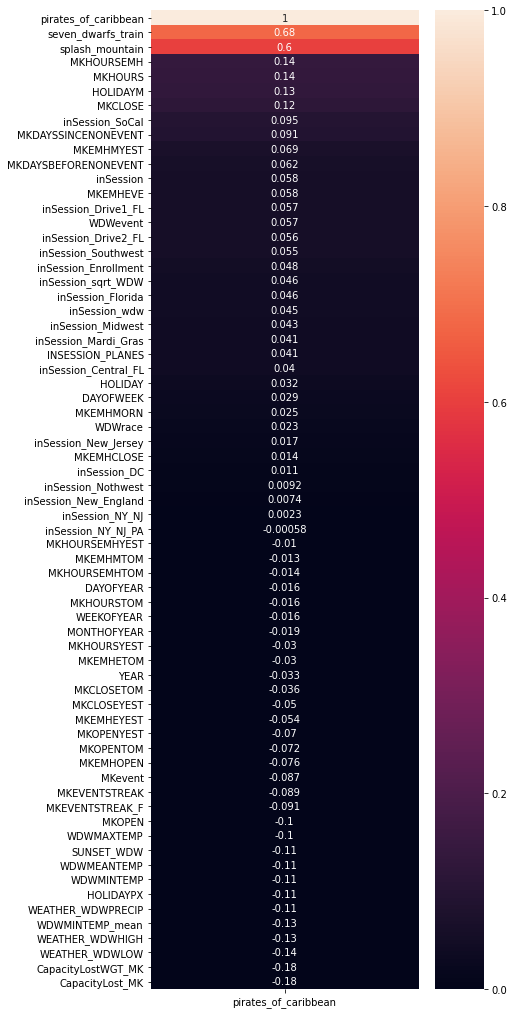

In [27]:
corr = mk.corr()
plt.figure(figsize = (6,18))
sns.heatmap(corr[['pirates_of_caribbean']].sort_values(by = 'pirates_of_caribbean', ascending = False).head(70),vmin = 0, annot = True)
plt.show()

In [28]:
# plt.plot(mk['pirates_of_caribbean']);

In [29]:
import numpy as np
from math import sqrt
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
%matplotlib inline

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from datetime import date
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

In [31]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn import svm

In [32]:
features = ['splash_mountain', 'seven_dwarfs_train', 'YEAR', 'MKHOURS', 'MKHOURSEMH', 'inSession','DAYOFWEEK' ,'HOLIDAYM']
y = mk['pirates_of_caribbean']
X = mk[features]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.02, random_state=21)
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [34]:
# Created my model and started the train test split
linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
linreg_preds_train = linreg.predict(X_train_sc)
linreg_rms_train = sqrt(mean_squared_error(y_train, linreg_preds_train))
linreg_rms_train

12.654748514347235

In [36]:
linreg_preds_test = linreg.predict(X_test_sc)
linreg_rms_test = sqrt(mean_squared_error(y_test, linreg_preds_test))
linreg_rms_test

12.435674699524492

## KNN

In [37]:
# Instiantiated KNN and fitted the training
knn = KNeighborsRegressor()
knn.fit(X_train_sc, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [38]:
knn_preds_train = knn.predict(X_train_sc)
knn_rms_train = sqrt(mean_squared_error(y_train, knn_preds_train))
knn_rms_train

9.131882053336803

In [39]:
knn_preds_test = knn.predict(X_test_sc)
knn_rms_test = sqrt(mean_squared_error(y_test, knn_preds_test))
knn_rms_test


10.761423303227785

## Decision Tree Model

In [40]:

# Instiantiate model and fit
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
dt_preds_train = dt.predict(X_train_sc)
dt_rms_train = sqrt(mean_squared_error(y_train, dt_preds_train))
dt_rms_train

2.367189204317029

In [42]:
dt_preds_test = dt.predict(X_test_sc)
dt_rms_test = sqrt(mean_squared_error(y_test, dt_preds_test))
dt_rms_test

14.746893100220289

## Bagged Decision Tree

In [43]:
# Instiantiate model and fit
bag = BaggingRegressor()
bag.fit(X_train_sc, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [44]:
bag_preds_train = bag.predict(X_train_sc)
bag_rms_train = sqrt(mean_squared_error(y_train, dt_preds_train))
bag_rms_train

2.367189204317029

In [45]:
bag_preds_test = dt.predict(X_test_sc)
bag_rms_test = sqrt(mean_squared_error(y_test, dt_preds_test))
bag_rms_test

14.746893100220289

## Random Forests

In [46]:
# Instiantiate model and fit
rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:

rf_preds_train = rf.predict(X_train_sc)
rf_rms_train = sqrt(mean_squared_error(y_train, rf_preds_train))
rf_rms_train

4.413858884400402

In [48]:
rf_preds_test = rf.predict(X_test_sc)
rf_rms_test = sqrt(mean_squared_error(y_test, rf_preds_test))
rf_rms_test

10.632264381194267

## ADA boost

In [49]:
# Instiantiate model and fit
ada = AdaBoostRegressor()
ada.fit(X_train_sc, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [50]:
ada_preds_train = dt.predict(X_train_sc)
ada_rms_train = sqrt(mean_squared_error(y_train, dt_preds_train))
ada_rms_train

2.367189204317029

In [51]:
ada_preds_test = ada.predict(X_test_sc)
ada_rms_test = sqrt(mean_squared_error(y_test, ada_preds_test))
ada_rms_test

14.091281982091695

## SVM

In [52]:
# Instiantiate model and fit
svr = svm.SVR()
svr.fit(X_train_sc, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [53]:
svr_preds_train = svr.predict(X_train_sc)
svr_rms_train = sqrt(mean_squared_error(y_train, svr_preds_train))
svr_rms_train

11.824824984967567

In [54]:
svr_preds_test = svr.predict(X_test_sc)
svr_rms_test = sqrt(mean_squared_error(y_test, svr_preds_test))
svr_rms_test

11.608539967414586

# Nothing under here works

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False, random_state=42)

In [56]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [57]:
model = Sequential()
model.add(Dense(8, # How many neurons do we want in the first layer, 
               activation='relu',
               input_shape=(8,)))
model.add(Dense(1, activation=None))

In [58]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['mse'])

In [59]:
model.fit(X_train_sc, y_train,
         epochs=10,
         batch_size=16,
         validation_data=(X_test_sc, y_test))

Epoch 1/10
1456/1456 [==============================] - 1s 836us/step - loss: -276.9918 - mse: 655.8491 - val_loss: -337.0065 - val_mse: 4605.8608
Epoch 2/10
1456/1456 [==============================] - 1s 749us/step - loss: -292.8850 - mse: 646.2380 - val_loss: -337.0150 - val_mse: 4662.5879
Epoch 3/10
1456/1456 [==============================] - 1s 736us/step - loss: -292.9349 - mse: 645.2102 - val_loss: -337.0150 - val_mse: 4657.5566
Epoch 4/10
1456/1456 [==============================] - 1s 735us/step - loss: -292.9529 - mse: 645.1789 - val_loss: -337.0150 - val_mse: 4657.5566
Epoch 5/10
1456/1456 [==============================] - 1s 742us/step - loss: -292.9532 - mse: 645.1797 - val_loss: -337.0150 - val_mse: 4657.5566
Epoch 6/10
1456/1456 [==============================] - 1s 748us/step - loss: -292.9529 - mse: 645.1793 - val_loss: -337.0150 - val_mse: 4657.5566
Epoch 7/10
1456/1456 [==============================] - 1s 741us/step - loss: -292.9532 - mse: 645.1791 - val_loss: -3

In [ ]:
x

In [60]:
features = ['splash_mountain', 'seven_dwarfs_train','YEAR', 'MKHOURS', 'MKHOURSEMH', 'inSession','DAYOFWEEK' ,'HOLIDAYM' ]

y = mk['pirates_of_caribbean']
# X = mk.drop(columns='pirates_of_caribbean')
X = mk[features] 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)


In [62]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [63]:
# Create training sequences
train_seq = TimeseriesGenerator(
            X_train_sc, y_train,
            length=8,
            batch_size=64)

In [64]:
# Create test sequences
batch_x, batch_y = train_seq[0]

In [65]:
# train_seq[0]
# train_seq[0][0]
train_seq[0][0].shape

(64, 8, 8)

In [66]:
test_seq = TimeseriesGenerator(
            X_test_sc, y_test,
            length=8,
            batch_size=64)

In [67]:
# Design RNN
model = Sequential()
model.add(GRU(8, input_shape=(8, 8), return_sequences=True))
model.add(GRU(8, return_sequences=True))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['mse'])

In [68]:
hist = model.fit(train_seq, epochs=5, validation_data=test_seq)

Epoch 1/5
364/364 [==============================] - 3s 9ms/step - loss: -130.0807 - mse: 706.3821 - val_loss: -327.1556 - val_mse: 829.7214
Epoch 2/5
364/364 [==============================] - 2s 7ms/step - loss: -289.1426 - mse: 701.7177 - val_loss: -336.9466 - val_mse: 829.7213
Epoch 3/5
364/364 [==============================] - 2s 7ms/step - loss: -292.7005 - mse: 701.7177 - val_loss: -337.0800 - val_mse: 829.7213
Epoch 4/5
364/364 [==============================] - 2s 7ms/step - loss: -292.8632 - mse: 701.7177 - val_loss: -337.0849 - val_mse: 829.7213
Epoch 5/5
364/364 [==============================] - 2s 7ms/step - loss: -292.8824 - mse: 701.7177 - val_loss: -337.0861 - val_mse: 829.7213


In [69]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [70]:
mk.index.min()


'2015-01-01 07:00:00'

In [71]:
mk.index.max()

'2020-01-01 01:00:00'

In [72]:
features = ['splash_mountain', 'seven_dwarfs_train', 'YEAR', 'MKHOURS', 'MKHOURSEMH', 'inSession','DAYOFWEEK' ,'HOLIDAYM']
y = mk['pirates_of_caribbean']
X = mk[features]

In [73]:
'pirates_of_caribbean'

'pirates_of_caribbean'

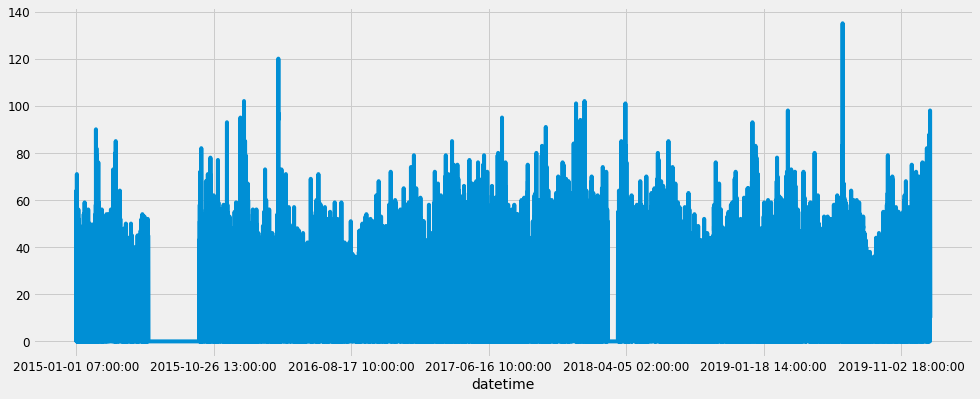

In [74]:
y.plot(figsize=(15, 6))
plt.show()

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = results.get_prediction(start=('2020-03-13 21:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Wait Times')
plt.legend()
plt.show()